In [57]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import seaborn as sns

In [58]:
data = pd.read_excel('./scrapped/Final data for clustering.xlsx')
data.head()

,State,Population,Male-female ratio,# kids per person,percent infant mortality,Migrant population aged 5 and over,Specific rate of economic participation
0,01 Aguascalientes,1425607,95.576905,2.109342,6.155518,80357,63.304197
1,02 Baja California,3769020,101.721123,1.903566,6.364128,269985,65.509672
2,03 Baja California Sur,798447,103.390750,1.900622,5.947572,85835,67.045768
3,04 Campeche,928363,96.927394,2.095864,6.509272,37557,63.341754
4,07 Chiapas,5543828,95.350968,2.342042,7.455336,149762,61.188540


In [59]:
features = data.columns[1:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

In [60]:
kmeans_kwargs = {"init": "random",
"n_init": 10,
"max_iter": 300,
 "random_state": 42,}
 # A list holds the SSE values for each k
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

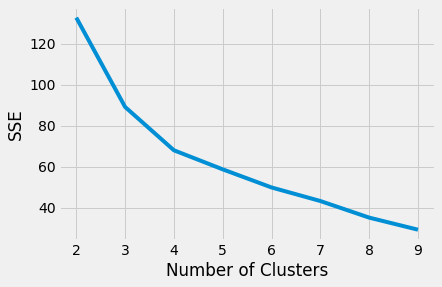

In [61]:
#%matplotlib inline
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [62]:
kl = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [63]:
kmeans = KMeans(init="random",n_clusters=kl.elbow,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, random_state=42)

In [64]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
kmeans_silhouette

0.3

In [65]:
pca = PCA(n_components = 2)
pca.fit(scaled_features)

PCA(n_components=2)

In [68]:
PCA_df = pd.DataFrame(pca.transform(scaled_features))
PCA_df.columns = ['Component 1','Component 2']
PCA_df['cluster'] = kmeans.labels_
PCA_df['State'] = data['State']

c:\Users\u0132030\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


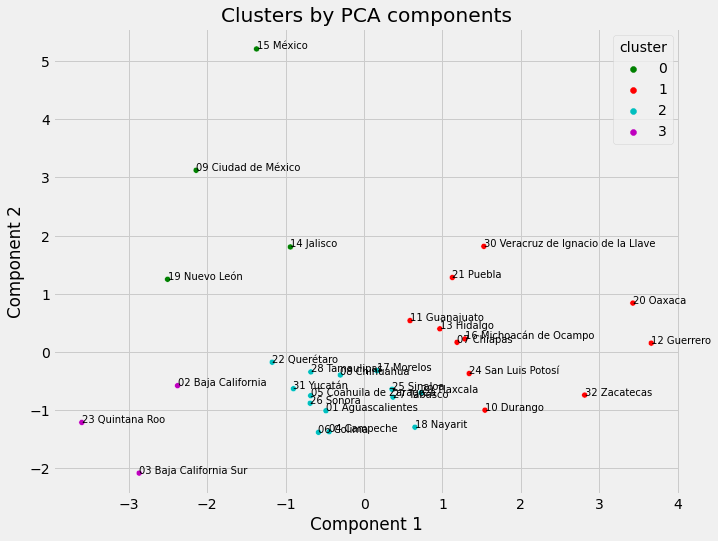

In [72]:
x_axis = PCA_df['Component 1']
y_axis = PCA_df['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = PCA_df['cluster'], palette = ['g','r','c','m'])
for i in range(PCA_df.shape[0]):
 plt.text(x=PCA_df['Component 1'][i],y=PCA_df['Component 2'][i],s=PCA_df['State'][i], 
          fontdict=dict(color='black',size=10))
plt.title('Clusters by PCA components')
plt.show()

